<a href="https://colab.research.google.com/github/bhaarath-M/python_task/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [417]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [418]:
titanic_train=pd.read_csv("/content/train (1).csv")
titanic_test=pd.read_csv("/content/test.csv")

In [419]:
titanic=pd.concat([titanic_train,titanic_test],axis=0,sort=False)

In [420]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [421]:
titanic.set_index("PassengerId")

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


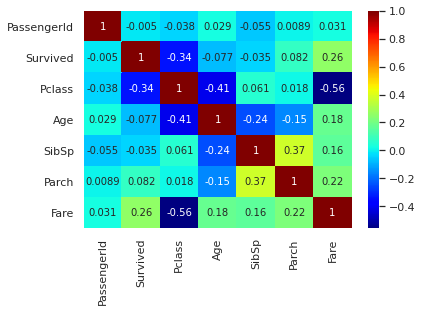

In [422]:
sns.heatmap(titanic.corr(),annot=True,cmap="jet")

In [423]:
titanic["Survived"].value_counts()    ## we dont have this column in test data

0.0    549
1.0    342
Name: Survived, dtype: int64

In [424]:
(titanic[titanic.Survived==1].SibSp!=0).sum()/342*100

38.59649122807017

###out of 342 survived people 39% of people has siblings or spouse on board

In [425]:
(titanic[titanic.Survived==0].SibSp!=0).sum()/549*100

27.504553734061933

### out of 549 people who died almost 28% had siblings or spouse on board

In [426]:
(titanic[titanic.Survived==1].Parch!=0).sum()/342*100


31.871345029239766

### out of 342 people survived 32% had parents or children on board

In [427]:
(titanic[titanic.Survived==0].Parch!=0).sum()/549*100


18.94353369763206

### out of 549 who died 19% had parents or children on board

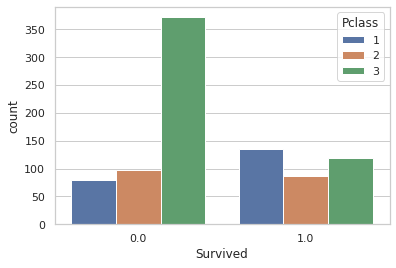

In [428]:
sns.countplot(x=titanic.Survived,hue=titanic.Pclass)
### people travelled in class 3 had less chances of survival

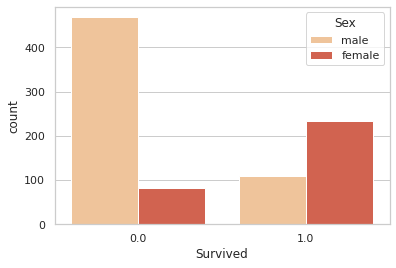

In [429]:
sns.countplot(x=titanic.Survived,hue=titanic.Sex,palette="OrRd")
### the survival rate of female is high compared to male 
### as we see in the graph out of 549 people who died more than 75% people are male

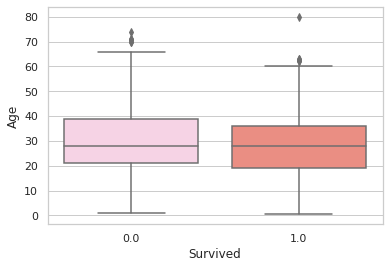

In [430]:
sns.boxplot(x=titanic.Survived,y=titanic.Age,palette="Set3_r")

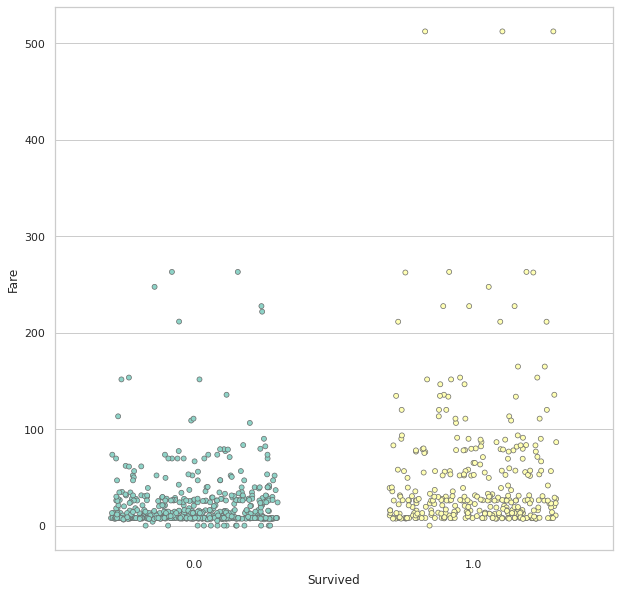

In [431]:
plt.figure(figsize=(10,10))
sns.stripplot(x=titanic.Survived,y=titanic.Fare,palette="Set3",linewidth=0.7,jitter=0.3)

In [432]:
## C = Cherbourg, Q = Queenstown, S = Southampton

dict={"C":"Cherbourg","Q":"Queenstown","S":"Southampton"}               
titanic["Embarked_new"]=titanic["Embarked"].map(dict)
titanic.drop("Embarked",axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_new
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,Southampton


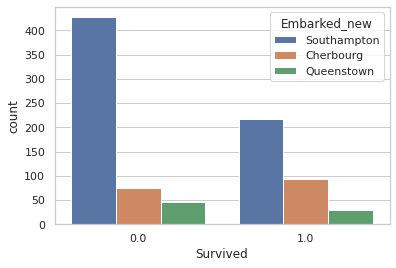

In [433]:
sns.countplot(x=titanic.Survived,hue=titanic.Embarked_new)   

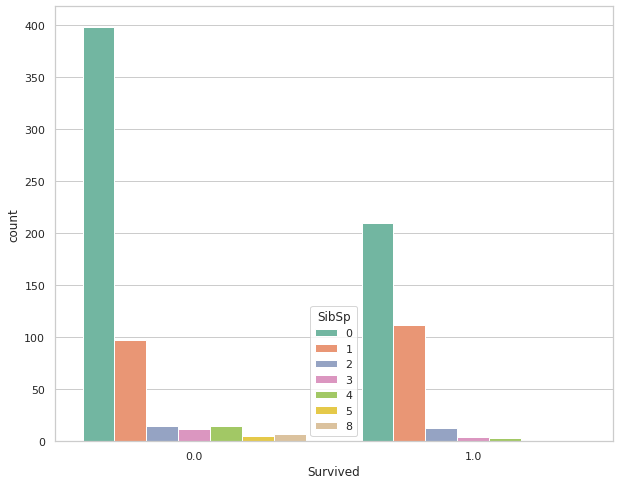

In [434]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.countplot(x=titanic.Survived,hue=titanic.SibSp,palette="Set2")

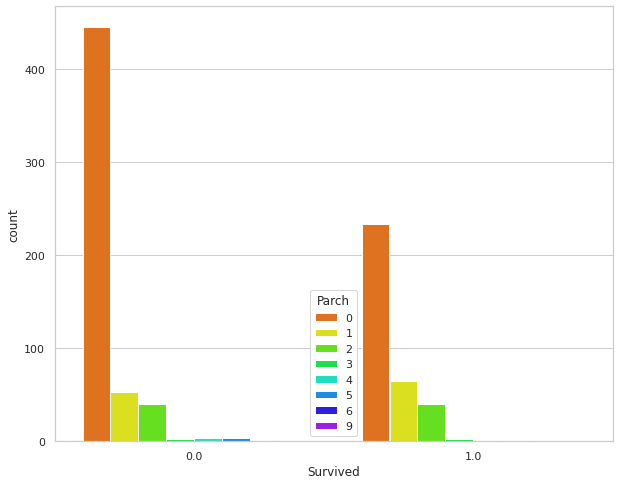

In [435]:
plt.figure(figsize=(10,8))
sns.set_theme(style="whitegrid")
sns.countplot(x=titanic.Survived,hue=titanic.Parch,palette="gist_rainbow")

In [436]:
titanic.groupby("Pclass").mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,672.492260,0.629630,39.159930,0.436533,0.365325,87.508992
2,671.566787,0.472826,29.506705,0.393502,0.368231,21.179196
3,640.558533,0.242363,24.816367,0.568406,0.400564,13.302889


In [437]:
titanic["Pclass"].value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

### class 3 has the highest number of people 

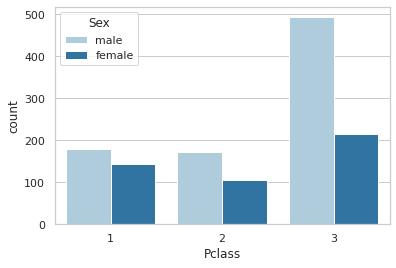

In [438]:
sns.countplot(x=titanic.Pclass,hue=titanic.Sex,palette="Paired")

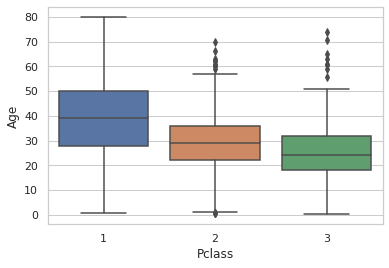

In [439]:
sns.boxplot(x=titanic.Pclass,y=titanic.Age)
### from the plot we can see that class 1 has more aged people where as younger people are travelling  most in class 3 

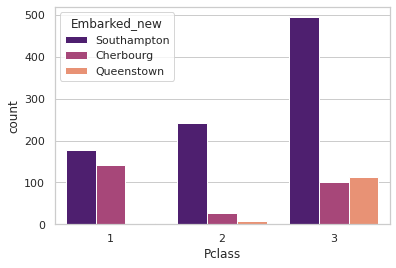

In [440]:
sns.countplot(x=titanic.Pclass,hue=titanic.Embarked_new,palette="magma")
### more number of people are boarded from Southampton port and in that most number of people are travelling in class 3 .

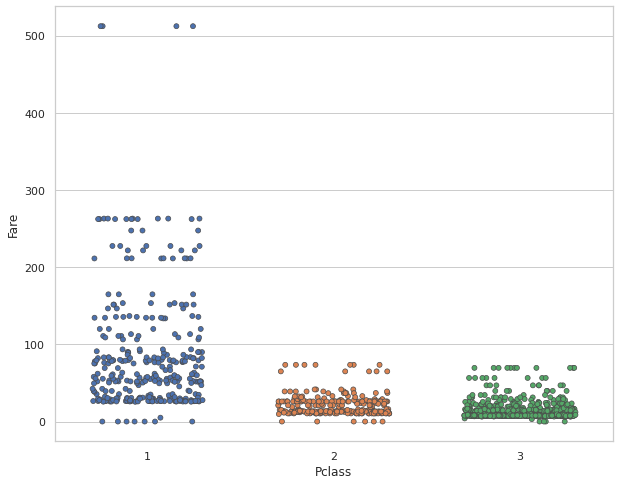

In [441]:
plt.figure(figsize=(10,8))
sns.stripplot(x=titanic.Pclass,y=titanic.Fare,linewidth=0.7,jitter=0.3)


In [442]:
titanic.drop("Name",axis=1,inplace=True)
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_new
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,Southampton


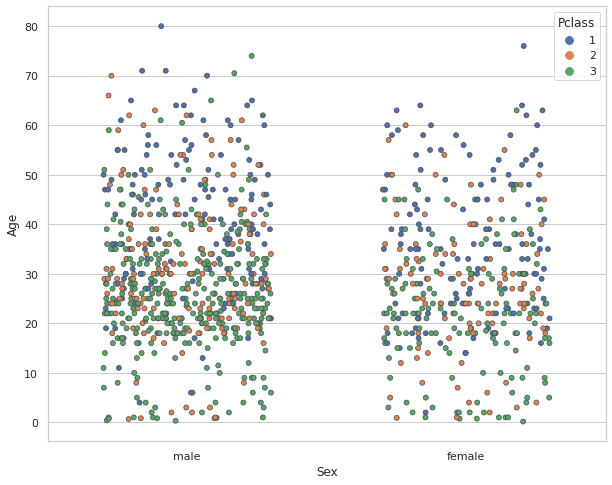

In [443]:
plt.figure(figsize=(10,8))
sns.stripplot(x=titanic.Sex,y=titanic.Age,hue=titanic.Pclass,linewidth=0.7,jitter=0.3)

### people who were above 50yrs mostly travelled in class 1 

In [444]:
titanic["Age"].describe()

count    1046.000000
mean       29.881138
std        14.413493
min         0.170000
25%        21.000000
50%        28.000000
75%        39.000000
max        80.000000
Name: Age, dtype: float64

In [445]:
titanic.Age.isnull().sum()/len(titanic.Age)*100
### since the missing value is only 20% we can impute the missing values

20.091673032849503

In [446]:
mean=titanic["Age"].mean(skipna=True)
titanic["Age"]=titanic["Age"].replace(np.NAN,mean)

In [447]:
titanic.Age.isna().sum()

0

In [448]:
age_group=pd.cut(titanic.Age,bins=4)

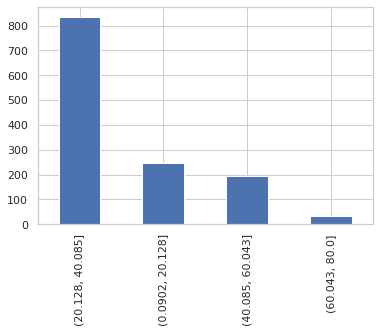

In [449]:
age_group.value_counts().plot(kind="bar")
### maximum number of people boarded are in the age group of 20 to 40

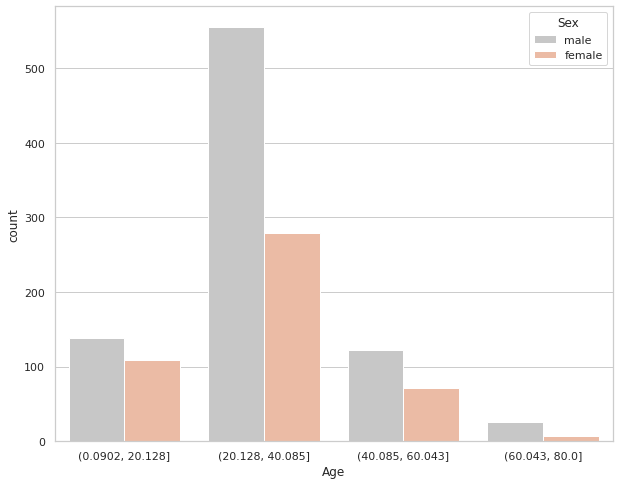

In [450]:
### lets differentiate with respect to sex
plt.figure(figsize=(10,8))
sns.countplot(x=age_group,hue=titanic.Sex,palette="RdGy_r")

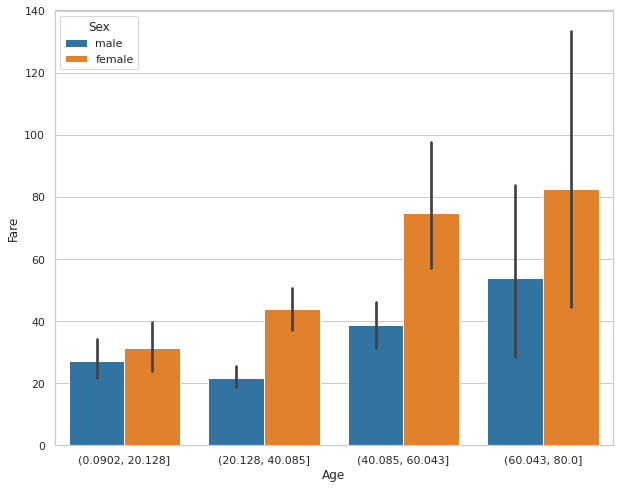

In [451]:
plt.figure(figsize=(10,8))

sns.barplot(x=age_group,y=titanic.Fare,hue=titanic.Sex,palette="tab10")
### In the same age group female has high fare compared to male

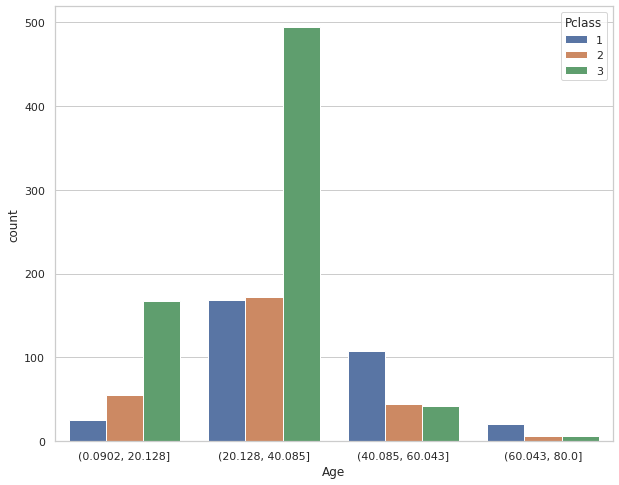

In [452]:
plt.figure(figsize=(10,8))

sns.countplot(x=age_group,hue=titanic.Pclass)

In [453]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_new
0,1,0.0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,Southampton
1,2,1.0,1,female,38.0,1,0,PC 17599,71.2833,C85,Cherbourg
2,3,1.0,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,Southampton
3,4,1.0,1,female,35.0,1,0,113803,53.1000,C123,Southampton
4,5,0.0,3,male,35.0,0,0,373450,8.0500,NaN,Southampton


In [454]:
titanic.Embarked_new.isnull().sum()

2

In [455]:
titanic[titanic.Embarked_new.isna()]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked_new
61,62,1.0,1,female,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,female,62.0,0,0,113572,80.0,B28,NaN


In [456]:
titanic["Embarked_new"]=titanic["Embarked_new"].replace(np.NAN,"Southampton")
### most of the passengers travelling in class 1 are boarded from southampton so with respect to that i have replaced it.


In [457]:
### cabin and ticket column has more missing values and it doesn't impact the survival rate for that reason deleting the particular column.
titanic.drop(["Cabin","Ticket","PassengerId"],axis=1,inplace=True)

In [458]:
### handling the categorical values

In [459]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_new
0,0.0,3,male,22.0,1,0,7.2500,Southampton
1,1.0,1,female,38.0,1,0,71.2833,Cherbourg
2,1.0,3,female,26.0,0,0,7.9250,Southampton
3,1.0,1,female,35.0,1,0,53.1000,Southampton
4,0.0,3,male,35.0,0,0,8.0500,Southampton


In [460]:
titanic["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [461]:
titanic["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [462]:
## we can addd the 2 columns(sibsp and parch) and name it as family members
titanic["Family_members"]=titanic["SibSp"]+titanic["Parch"]

In [463]:
titanic.drop(["SibSp","Parch"],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Embarked_new,Family_members
0,0.0,3,male,22.0,7.2500,Southampton,1
1,1.0,1,female,38.0,71.2833,Cherbourg,1
2,1.0,3,female,26.0,7.9250,Southampton,0
3,1.0,1,female,35.0,53.1000,Southampton,1
4,0.0,3,male,35.0,8.0500,Southampton,0


In [464]:
titanic["Family_members"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family_members, dtype: int64

In [465]:
cols_to_be_changed=["Pclass","Sex","Embarked_new","Family_members"]
titanic=pd.get_dummies(data=titanic,columns=cols_to_be_changed,drop_first=True)


In [466]:
titanic.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_new_Queenstown,Embarked_new_Southampton,Family_members_1,Family_members_2,Family_members_3,Family_members_4,Family_members_5,Family_members_6,Family_members_7,Family_members_10
0,0.0,22.0,7.2500,0,1,1,0,1,1,0,0,0,0,0,0,0
1,1.0,38.0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,26.0,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1.0,35.0,53.1000,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0.0,35.0,8.0500,0,1,1,0,1,0,0,0,0,0,0,0,0


In [467]:
titanic.columns

Index(['Survived', 'Age', 'Fare', 'Pclass_2', 'Pclass_3', 'Sex_male',
       'Embarked_new_Queenstown', 'Embarked_new_Southampton',
       'Family_members_1', 'Family_members_2', 'Family_members_3',
       'Family_members_4', 'Family_members_5', 'Family_members_6',
       'Family_members_7', 'Family_members_10'],
      dtype='object')

In [468]:
train_data=pd.DataFrame(titanic[0:891])

In [469]:
train_data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_new_Queenstown,Embarked_new_Southampton,Family_members_1,Family_members_2,Family_members_3,Family_members_4,Family_members_5,Family_members_6,Family_members_7,Family_members_10
0,0.0,22.0,7.2500,0,1,1,0,1,1,0,0,0,0,0,0,0
1,1.0,38.0,71.2833,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1.0,26.0,7.9250,0,1,0,0,1,0,0,0,0,0,0,0,0
3,1.0,35.0,53.1000,0,0,0,0,1,1,0,0,0,0,0,0,0
4,0.0,35.0,8.0500,0,1,1,0,1,0,0,0,0,0,0,0,0


In [470]:
test_data=pd.DataFrame(titanic[891:])

In [471]:
test_data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_new_Queenstown,Embarked_new_Southampton,Family_members_1,Family_members_2,Family_members_3,Family_members_4,Family_members_5,Family_members_6,Family_members_7,Family_members_10
0,NaN,34.5,7.8292,0,1,1,1,0,0,0,0,0,0,0,0,0
1,NaN,47.0,7.0000,0,1,0,0,1,1,0,0,0,0,0,0,0
2,NaN,62.0,9.6875,1,0,1,1,0,0,0,0,0,0,0,0,0
3,NaN,27.0,8.6625,0,1,1,0,1,0,0,0,0,0,0,0,0
4,NaN,22.0,12.2875,0,1,0,0,1,0,1,0,0,0,0,0,0


In [472]:
test_data.drop("Survived",axis=1,inplace=True)


In [473]:
mean_fare=test_data["Fare"].mean()
test_data["Fare"]=test_data["Fare"].replace(np.NAN,mean_fare)

In [474]:
test_data.head()

,Age,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_new_Queenstown,Embarked_new_Southampton,Family_members_1,Family_members_2,Family_members_3,Family_members_4,Family_members_5,Family_members_6,Family_members_7,Family_members_10
0,34.5,7.8292,0,1,1,1,0,0,0,0,0,0,0,0,0
1,47.0,7.0000,0,1,0,0,1,1,0,0,0,0,0,0,0
2,62.0,9.6875,1,0,1,1,0,0,0,0,0,0,0,0,0
3,27.0,8.6625,0,1,1,0,1,0,0,0,0,0,0,0,0
4,22.0,12.2875,0,1,0,0,1,0,1,0,0,0,0,0,0


In [475]:
x=train_data.drop("Survived",axis=1)
y=train_data["Survived"]

In [476]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [477]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [478]:
y_prediction=rfc.predict(x_test)

In [479]:
confusion_matrix(y_test,y_prediction)

array([[138,  27],
       [ 27,  76]])

In [482]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

         0.0       0.84      0.84      0.84       165
         1.0       0.74      0.74      0.74       103

    accuracy                           0.80       268
   macro avg       0.79      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [483]:
final_prediction=rfc.predict(test_data)

In [484]:
from sklearn.model_selection import RandomizedSearchCV
param_distributions = {
    'n_estimators':np.arange(50,251,50),
    'criterion':['gini','entropy'],
    'max_depth':np.arange(1,10),
    'max_features':np.arange(1,4),
    'min_samples_leaf':np.arange(1,11)
}

In [485]:
estimator = RandomForestClassifier(random_state=0)

In [486]:

rscv = RandomizedSearchCV(estimator,param_distributions,cv=10)

In [488]:
rscv.fit(x_train,y_train)


RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [489]:

rscv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [490]:
tuned_rfc=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [491]:
tuned_rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=6, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [494]:
ypred=tuned_rfc.predict(x_test)

In [495]:
confusion_matrix(y_test,ypred)

array([[152,  13],
       [ 35,  68]])

In [497]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

         0.0       0.81      0.92      0.86       165
         1.0       0.84      0.66      0.74       103

    accuracy                           0.82       268
   macro avg       0.83      0.79      0.80       268
weighted avg       0.82      0.82      0.82       268

